# Deconvolution Visualization

## Where the data at?

In [1]:
input_path = '../Data/Processed_Data/'
output_path = '../Data/Processed_Data/Cell_Deconvolution/'

## Interpreting Results

In [2]:
import pandas as pd

# Read deconvolution results

deconv = pd.read_csv(output_path+'Results_TrainData_ARIC.csv', index_col=0)
deconv_test = pd.read_csv(output_path+'Results_TestData_ARIC.csv', index_col=0)

# Get basic statistics of deconvolution results
round(deconv.T.describe(),2)

cell types,CD8T,CD4T,NK,Bcell,Mono,Neu
count,1142.00,1142.00,1142.00,1142.00,1142.00,1142.00
mean,0.08,0.15,0.09,0.13,0.33,0.22
std,0.06,0.05,0.05,0.07,0.08,0.08
min,0.00,0.03,0.00,0.00,0.03,0.00
25%,0.04,0.12,0.06,0.08,0.29,0.17
50%,0.07,0.15,0.08,0.11,0.33,0.23
75%,0.11,0.18,0.11,0.17,0.38,0.27
max,0.40,0.50,0.31,0.59,0.83,0.49


In [3]:
round(deconv_test.T.describe(),2)

cell types,CD8T,CD4T,NK,Bcell,Mono,Neu
count,204.00,204.00,204.00,204.00,204.00,204.00
mean,0.06,0.14,0.09,0.11,0.37,0.23
std,0.05,0.04,0.05,0.08,0.09,0.09
min,0.00,0.03,0.00,0.01,0.12,0.00
25%,0.02,0.12,0.05,0.06,0.32,0.17
50%,0.06,0.14,0.08,0.09,0.36,0.24
75%,0.10,0.17,0.12,0.14,0.40,0.29
max,0.22,0.30,0.26,0.44,0.86,0.44


In [4]:
# Import Plotting Functions
from FM_Functions.Data_Visualization import *

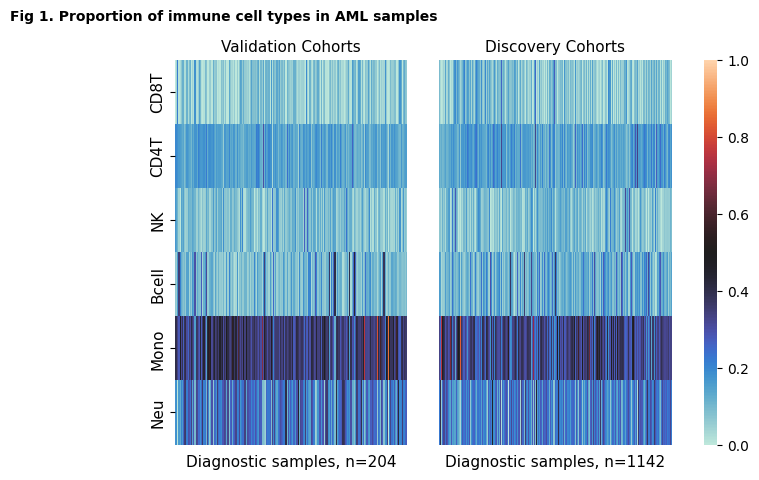

In [5]:
deconv.index.name = None
deconv_test.index.name = None
draw_heatmaps(fig_title = 'Proportion of immune cell types in AML samples',
            t1='Validation Cohorts', t2= 'Discovery Cohorts',
            df1 = deconv_test, df2 = deconv,
            save_plot=False, fig_number=1, figsize=(7,5))

## Import CIBERSORTx Results

In [11]:
df = pd.read_csv(output_path+'COG_clinicaldata_ciberscore_FMcleaned.csv')

# break 'Mixture' column by '-' and add to df
df['Patient_ID'] = df['Mixture'].str.split('-', expand=True)[2]

# Set index to Patient ID
df = df.set_index('Patient_ID')

# Remove induction failure patients
df = df[df['Tumor Code'] == '20 - Acute myeloid leukemia (AML)']

# Select columns of interest
cibersortx = df.iloc[:,1:23].join(df[['LSC6','pLSC6_gb']])

y = pd.read_csv(input_path+'y.csv', index_col=0)

# Split data into training and test sets by clinical trial
y_train = y[~y['Clinical Trial'].isin(['AML02','AML08'])]

# Add cibersortx to y_train
y_train2 = y_train.drop(columns=['pLSC6_gb']).join(cibersortx, how='inner', on='Patient_ID')

In [16]:
deconv.T

,CD8T,CD4T,NK,Bcell,Mono,Neu
201005010090_R03C01,0.040796,0.132652,0.083292,0.244599,0.374861,0.123799
201005010034_R05C01,0.093658,0.125704,0.068569,0.158814,0.329469,0.223786
201005010090_R02C01,0.131161,0.153804,0.075570,0.096914,0.295299,0.247251
201005010034_R06C01,0.141251,0.144729,0.105339,0.142142,0.272450,0.194090
201005010090_R04C01,0.152796,0.150274,0.105224,0.107323,0.303336,0.181047
...,...,...,...,...,...,...
200526210048_R07C01,0.104392,0.181001,0.024600,0.121235,0.318272,0.250499
200517480143_R01C01,0.076321,0.219949,0.005034,0.212112,0.302303,0.184281
200517480142_R04C01,0.058009,0.127744,0.054445,0.039044,0.393403,0.327356
200526210091_R07C01,0.014174,0.134903,0.068907,0.118135,0.354223,0.309659


In [17]:
y_train3 = y_train2.iloc[:,-24:-2].join(deconv.T, how='left')

In [22]:
y_train3.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,CD8T,CD4T,NK,Bcell,Mono,Neu
201005010090_R03C01,0.037192,0.226231,0.014037,0.074382,0.0,0.105324,0.043664,0.004744,0.0,0.000000,...,0.018085,0.006314,0.142891,0.004537,0.040796,0.132652,0.083292,0.244599,0.374861,0.123799
201005010034_R05C01,0.066217,0.061484,0.044736,0.030543,0.0,0.039400,0.000000,0.039093,0.0,0.000000,...,0.083392,0.130835,0.271948,0.054850,0.093658,0.125704,0.068569,0.158814,0.329469,0.223786
201005010090_R02C01,0.031598,0.166835,0.000000,0.053999,0.0,0.086400,0.000000,0.006481,0.0,0.086595,...,0.165865,0.033646,0.087662,0.000000,0.131161,0.153804,0.075570,0.096914,0.295299,0.247251
201005010034_R06C01,0.024600,0.094468,0.038663,0.016831,0.0,0.013115,0.008806,0.000000,0.0,0.039376,...,0.040288,0.008254,0.076989,0.061646,0.141251,0.144729,0.105339,0.142142,0.272450,0.194090
201005010090_R04C01,0.067200,0.021298,0.019304,0.077616,0.0,0.071045,0.021777,0.000000,0.0,0.000000,...,0.000000,0.122364,0.175985,0.000000,0.152796,0.150274,0.105224,0.107323,0.303336,0.181047


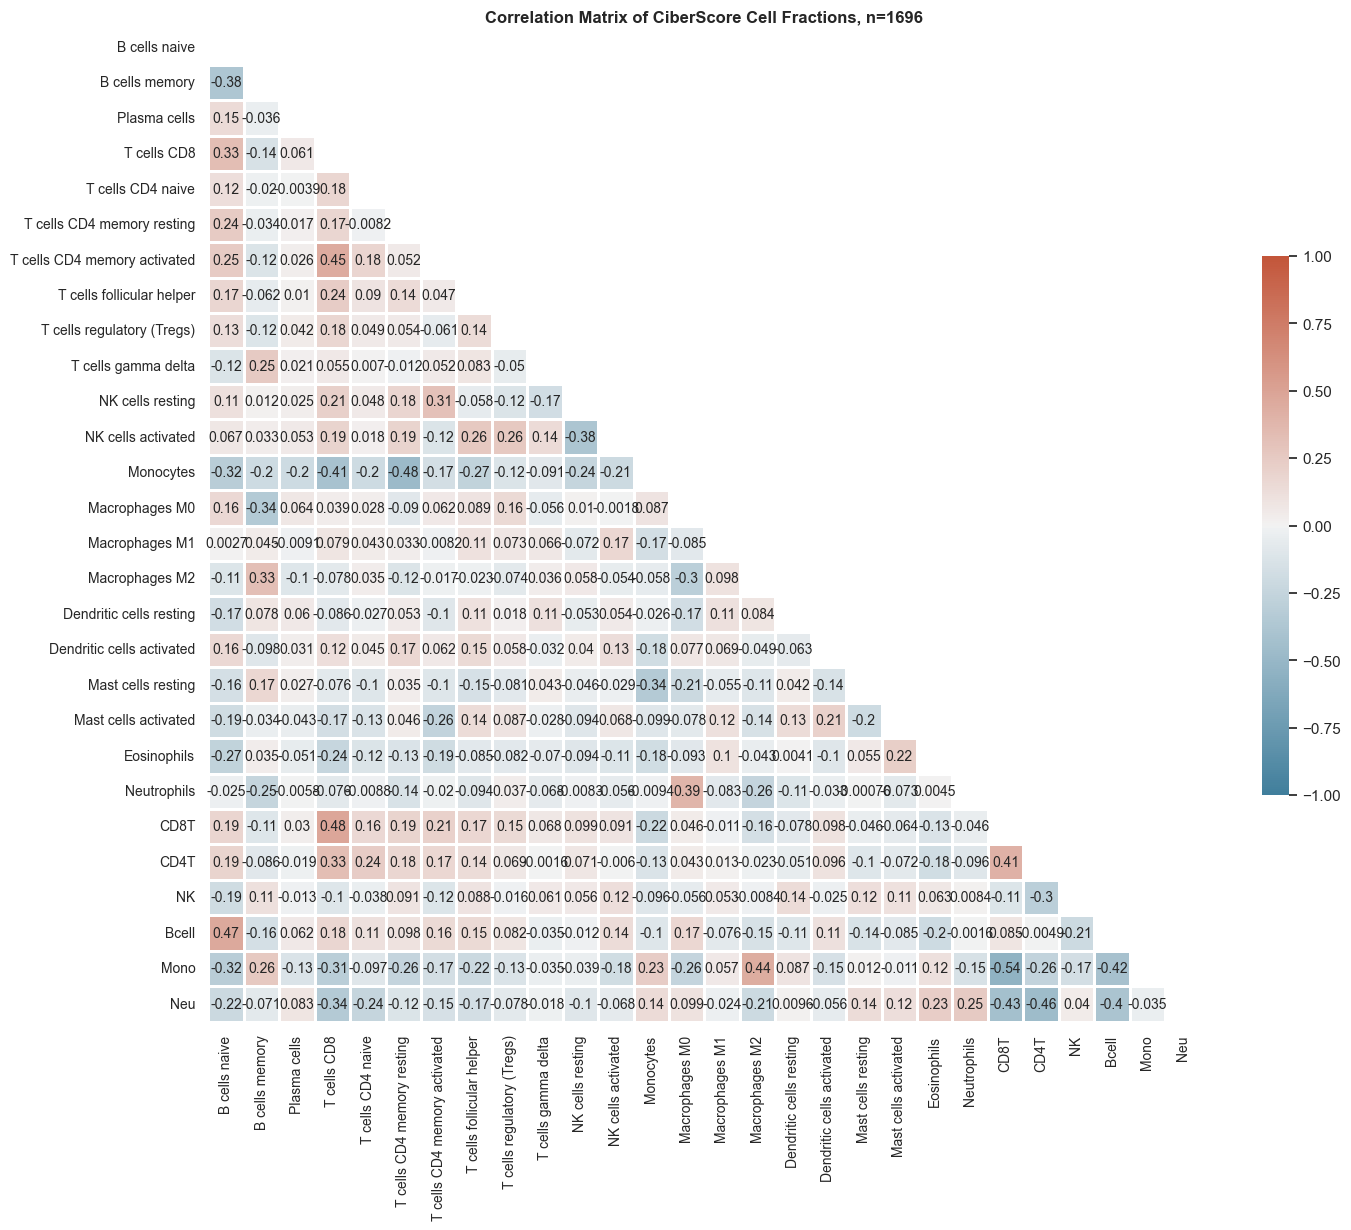

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

# Compute the correlation matrix
corr = y_train3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,annot=True,
            square=True, linewidths=1,cbar_kws={"shrink": .5}, annot_kws={"fontsize":10})

# Set plot specs
plt.title('Correlation Matrix of CiberScore Cell Fractions, n=1696',
            fontsize='medium', y=1,fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10)